Breast Cancer Wisconsin (Diagnostic) Data Set

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

## 本次目標：預測乳房腫塊是否為良性or惡性腫瘤




## 數據介紹：

[點擊連結](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)



## 目標欄位：

* 良性or惡性腫瘤(diagnosis)惡性=M 良性=B

* 轉換後的欄位(diagnosis) 惡性=0 良性=1



![](https://i.imgur.com/GF9ijyN.png)


## 使用演算法Kmeans分群 觀察效果

## 1. load 檔案 (pandas)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid") # 設置畫圖的風格
sns.set_context("paper") 
df = pd.read_csv("resize_data.csv") #讀取CSV檔
df.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [2]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##     2. 資料前處理 (dropna,one_hot_encoding...)


### Dropna

In [3]:
## dropna可去掉包含nan的行或列
df.dropna(
    axis=0,     # 0: 对行进行操作; 1: 对列进行操作
    how='any',   # 'any': 只要存在 NaN 就 drop 掉; 'all': 必须全部是 NaN 才 drop 
    inplace=True)
df = df.reset_index(drop=True)

In [4]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics

##     3. 切分檔案為訓練集,測試集(train_test_spilt)


In [198]:
X = df.drop(['diagnosis'],axis=1)
y = df['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2)


## 4. 呼叫模型並訓練資料(fit)

In [207]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(x_train)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## 5. 預測資料(predict)

In [208]:
y_pred = kmeans.predict(x_test)


## 6. 看預測成效如何(y_true與y_pred比對)

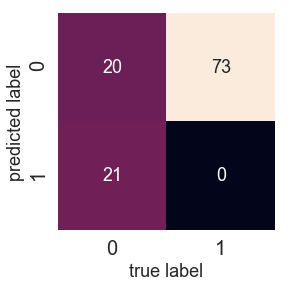

In [209]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.5)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('true label')
plt.ylabel('predicted label');

### 此圖是混淆矩陣 可以畫出預測與實際label的比較 

## Kmeans結果很爛= = 但至少知道，該資料單用距離來分群是分不出好結果的

## -------------------------------------

## 下面是XGB,現在數據比賽都在用的模型

## 用一個來做比較看看

## 結果幾乎快100% 跟鬼一樣, 後面會學到原理

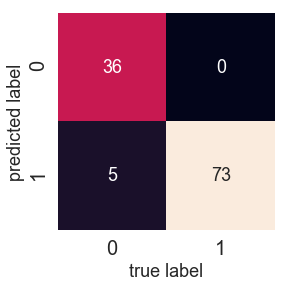

In [210]:
import xgboost as xgb
XGB = xgb.XGBClassifier()
XGB.fit(x_train,y_train)
y_pred = XGB.predict(x_test)
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.5)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('true label')
plt.ylabel('predicted label');

### 補充:DBSCAN 因無法輸入分群數量, 僅能以半徑與範圍內的相對標分群,所以無法對於該案例使用

## 作業: 心血管疾病預測 使用Kmeans方法預測